# Logistic Regression: Batch GD, Stochastic GD, Mini-batch GD 비교 (make_moons 데이터셋)

이번 실습에서는 **make_moons 데이터셋**을 사용하여 Logistic Regression을 학습합니다.
그리고 Gradient Descent 방식 (Batch, Stochastic, Mini-batch)에 따른 차이를 비교합니다.


In [ ]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 생성 및 전처리

C:\Users\kimyo\anaconda3\envs\PR\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


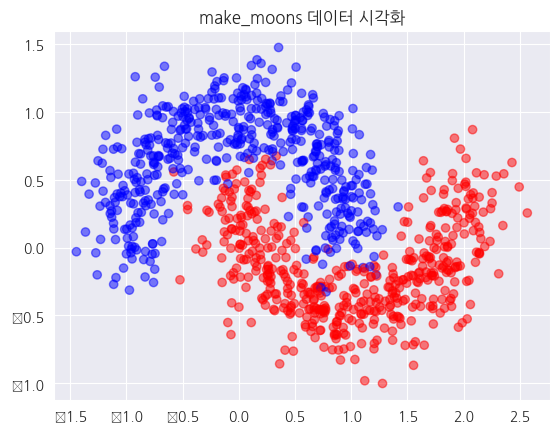

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.5)
plt.title("make_moons 데이터 시각화")
plt.show()

## 2. 학습 함수 정의

In [ ]:
def train_logistic(X, y, epochs=50, lr=0.1, batch_size=None):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(X.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    history = model.fit(X, y,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        validation_split=0.2)
    return history, model

## 3. Batch GD 학습 (전체 데이터 사용)

In [ ]:
history_batch, model_batch = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=len(X_train)
)

## 4. Stochastic GD 학습 (batch_size=1)

In [ ]:
history_sgd, model_sgd = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=1
)

## 5. Mini-batch GD 학습 (batch_size=32)

In [ ]:
history_mini, model_mini = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=32
)

## 6. Loss 비교 시각화

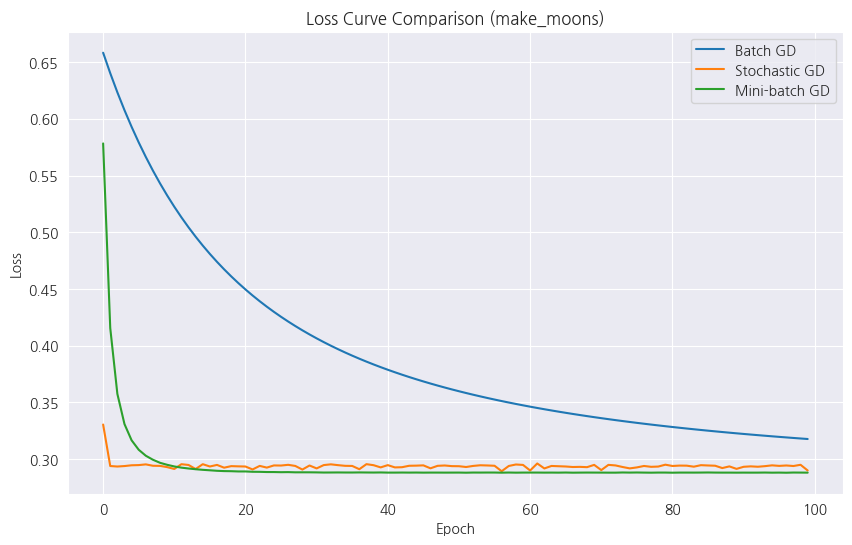

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_batch.history["loss"], label="Batch GD")
plt.plot(history_sgd.history["loss"], label="Stochastic GD")
plt.plot(history_mini.history["loss"], label="Mini-batch GD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve Comparison (make_moons)")
plt.show()

## 7. 최종 정확도 비교

In [ ]:
print("Batch GD 정확도:", model_batch.evaluate(X_test, y_test, verbose=0)[1])
print("Stochastic GD 정확도:", model_sgd.evaluate(X_test, y_test, verbose=0)[1])
print("Mini-batch GD 정확도:", model_mini.evaluate(X_test, y_test, verbose=0)[1])

Batch GD 정확도: 0.8450000286102295
Stochastic GD 정확도: 0.8650000095367432
Mini-batch GD 정확도: 0.8500000238418579


## 생각해보기
- 각 GD 방식의 장단점은 무엇일까요?

- 배치 GD (Batch GD): 전체 데이터로 매번 안정적인 기울기 계산 → 수렴 안정적이지만 큰 데이터에선 느리고 메모리 부담 큼
- 확률적 GD (Stochastic GD, SGD): 한 샘플씩 자주 업데이트 → 초기 수렴 빠르지만 진동 많고 최종 수렴이 불안정할 수 있음
- 미니배치 GD (Mini-Batch GD): 작은 배치 단위로 업데이트 → 배치와 SGD의 장점 절충 가능, 메모리-연산 효율 좋고 안정성/속도 균형이 좋음